In [1]:
import requests # to make TMDB API calls
import locale # to format currency as USD
locale.setlocale( locale.LC_ALL, '' )
import pinyin as pinyin

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # to format currency on charts axis


# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
api_key = 'aaa47fdcde4f3ddc7519fb20b452e47c'
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2020&sort_by=revenue.desc')

In [4]:
result = response.json()
titles = result['results']
#print(titles[0])
print("Title Keys:")
print(titles[0].keys())

Title Keys:
dict_keys(['adult', 'backdrop_path', 'genre_ids', 'id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'release_date', 'title', 'video', 'vote_average', 'vote_count'])


In [5]:
# Start of Dataframe df
new_dict = {}
for i in range(len(titles)) :
    #print(titles[i]['original_title'])
    new_dict[str(titles[i]['original_title'])] = [titles[i]['popularity'], titles[i]['release_date'], titles[i]['vote_count'], titles[i]['id'],titles[i]['release_date']]
#new_dict

In [6]:
data = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['popularity', 'release-date', 'vote count', 'id','release_date'])
result = data.sort_values('popularity', ascending=False)
resultdata = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['popularity', 'release-date', 'vote count','id','release_date'])
#data

<h1><font color=blue><fontsize: 45pt><center>Top 20 movies highest revenue in year 2020</center></h1>

In [7]:
# define column names for our new dataframe
columns = ['film', 'revenue','genre', 'no_of_genres']

# create dataframe with film and revenue columns
df = pd.DataFrame(columns=columns)
#df

In [8]:
#titles[0]['genre_ids']

In [9]:
en = pinyin.get(titles[0]['original_title'], format="strip", delimiter="")
#print(en)

In [10]:
for i in range(len(titles)) :
    en = pinyin.get(titles[i]['original_title'], format="strip", delimiter="")
    if(en.isalnum() == False):    # failed checking for の char
        temp_str = ''
        for k in en :
            if(k.isalnum()):
                temp_str += k
            else :
                temp_str += ' '
        en = temp_str
    titles[i]['original_title'] = en
    

    
titles[3]['original_title'] = 'juchangban guimie ren wuxianliechebian'   # temporary solution for non alpnum char

In [11]:
api_token = "aaa47fdcde4f3ddc7519fb20b452e47c"

for i in range(len(titles)) :
    genre = ''
    no_gen = 0
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(titles[i]['id']) +'?api_key='+ api_token+'&language=en-US')
    film_revenue = film_revenue.json()
    title = titles[i]['original_title']
    for i in range(len(film_revenue['genres'])):
        genre += '|'
        genre += film_revenue['genres'][i]['name']
        no_gen += 1
        
    df.loc[len(df)]=[title,film_revenue['revenue'],genre, no_gen] # store title and revenue in our dataframe
#df

<AxesSubplot:xlabel='revenue', ylabel='film'>

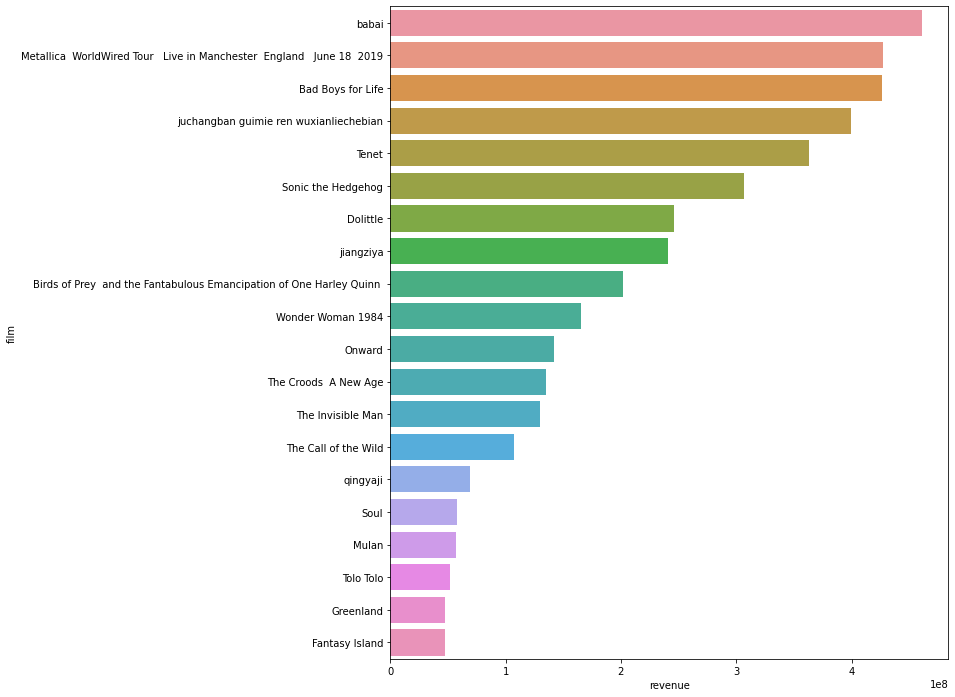

In [12]:
f = plt.figure(figsize=(10, 12))
sb.barplot(x="revenue", y="film", data= df)

<h1><font color=blue><fontsize: 45pt><center>Genre Analysis</center></h1>

In [13]:
film_revenue = requests.get('https://api.themoviedb.org/3/movie/508935?api_key=aaa47fdcde4f3ddc7519fb20b452e47c')
film_revenue = film_revenue.json()

In [14]:
#for i in range(len(film_revenue['genres'])):
    #print(film_revenue['genres'][i]['name'])
#film_revenue

<H3><font color=brown> NUMBER OF MOVIES RELEASED BY GENRE </H3>

Text(0.5, 0, 'Number of movies')

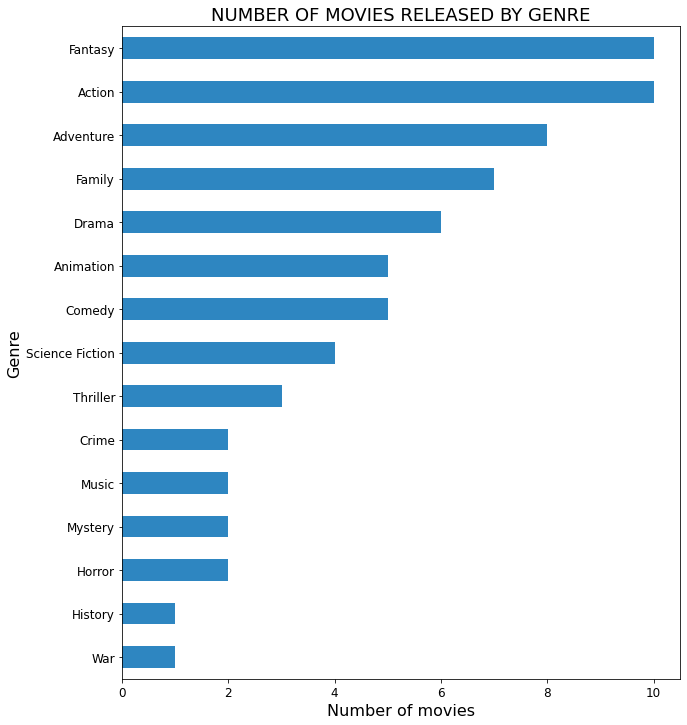

In [15]:
#Remove empty column and create a new dataframe called gen to see how many of each genre exists

Genre= pd.Series(df['genre'].str.cat(sep = '|').split("|") )
gen = Genre[Genre != '']   #remvoes empty genres
gen.value_counts(ascending=True).plot(kind="barh",figsize=(10,12), fontsize=12,color="#2E86C1")


plt.title("NUMBER OF MOVIES RELEASED BY GENRE", fontsize=18)
plt.ylabel("Genre", fontsize=16)
plt.xlabel("Number of movies", fontsize=16)

<H3><font color=brown> TOP 10 GENRE OF MOVIES </H3>

Text(0.5, 1.0, 'TOP 10 GENRE OF MOVIES')

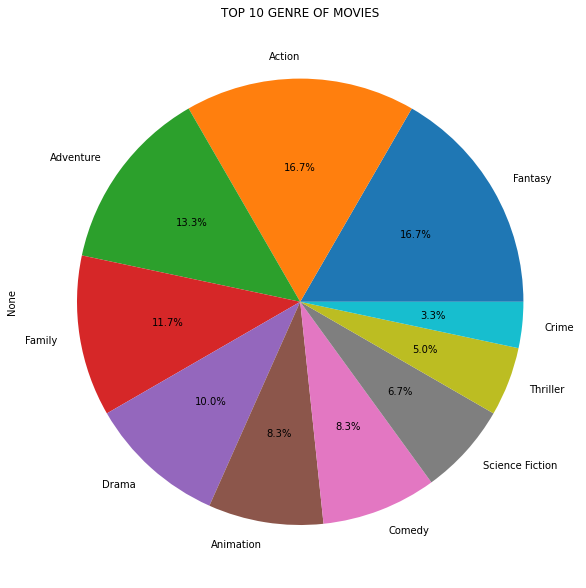

In [16]:
gen.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,12))
plt.title('TOP 10 GENRE OF MOVIES')

In [17]:
# Remove duplicate
#Creates new dataframe called df_r_g to plot avg rev against genres
df_r_g = gen.drop_duplicates() #df with only genres
df_r_g = pd.DataFrame(data = df_r_g, columns = ["Genres"])

In [18]:
df_r_g.reset_index(drop = True,inplace = True)
#df_r_g

<h1><font color=blue><fontsize: 45pt><center>Average Revenue Per Genre</center></h1>

In [19]:
#There are 15 genres
#Getting average revenue of each genre
#Test of sub string in string
Rev = {}
for i in df_r_g.Genres :  #Rev list
    Rev[i] = 0

#for i in Rev.keys():
#    print(i)
#    if i in df.genre[0]:
#        print("A")
    


#print(df.genre[0])

In [20]:
# Total Revenue of each genre
for i in range(len(Rev)+1) :
    for j in Rev.keys():
        if j in df.genre[i] :     # if eg. war in war|history|etc
            Rev[j] += df.revenue[i]   # add revenue
#Rev

In [21]:
# Average Revenue
# Divide Total Revenue of each genre by the number of movies
#print(gen.value_counts())

for i in Rev.keys():
    k = gen.value_counts()[i]
    Rev[i] = int(Rev[i]/k)


#Rev

In [22]:
#This show the average revenue per movie EG : 3 movies with 'War', Add revenue of these 3 movies then divide by 3
df_r_g['AvgRev'] = df_r_g['Genres'].map(Rev)
df_r_g = df_r_g.sort_values(by='AvgRev',ascending = False)
#df_r_g

In [23]:
#### Adding number of movies for each genre to df_r_g
no_movies = []
for i in df_r_g['Genres'] :
    no_movies.append(gen.value_counts()[i])

In [24]:
df_r_g['no_movies'] = no_movies
#df_r_g

<H3><font color=brown> AVERAGE REVENUE AGAINST GENERE </H3>

Text(0, 0.5, 'Genres')

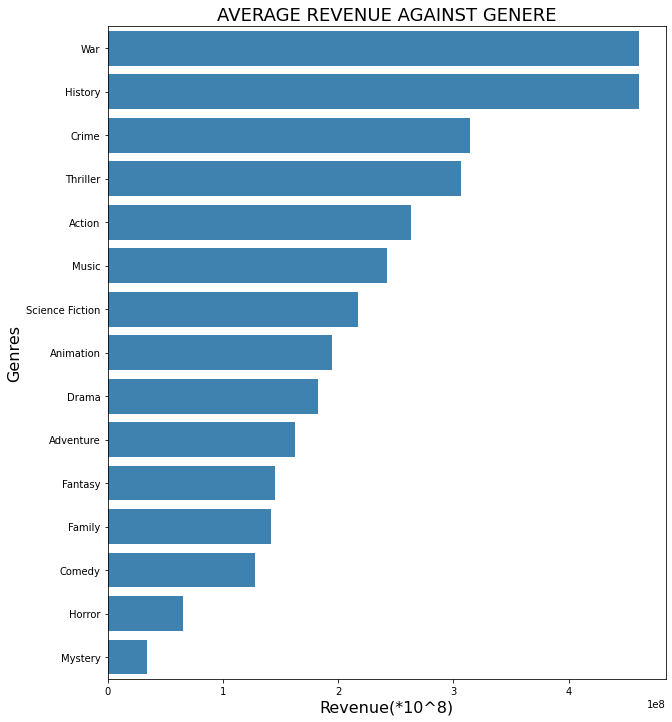

In [25]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(10, 12))
sb.barplot(x = "AvgRev", y = "Genres", data = df_r_g, color="#2E86C1")
plt.title("AVERAGE REVENUE AGAINST GENERE", fontsize=18)
plt.xlabel("Revenue(*10^8)", fontsize=16)
plt.ylabel("Genres", fontsize=16)

<H3><font color=brown> NO OF MOVIES AGAINST GENRE </H3>

Text(0, 0.5, 'Genres')

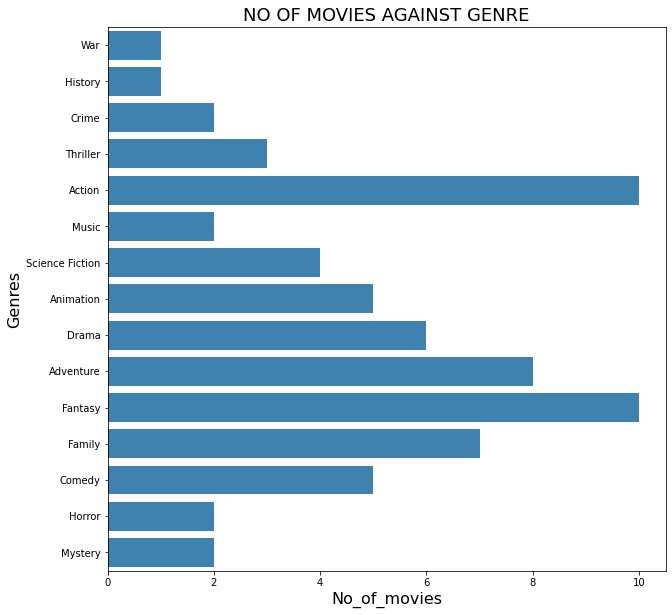

In [26]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(10, 10))
sb.barplot(x = "no_movies", y = "Genres", data = df_r_g, color="#2E86C1")
plt.title("NO OF MOVIES AGAINST GENRE", fontsize=18)
plt.xlabel("No_of_movies", fontsize=16)
plt.ylabel("Genres", fontsize=16)

From the 2 plots above, films that include the action genre tend to get more revenue than the others. As the top 4 genres of History to War does not have many movies, it is not an accurate depiction of what it would be if other films adopted those genres. However, films of action genres are relatively many and their average revenue is still pretty high hence action would be the best genre to add in films

<H3><font color=brown> NUMBER OF GENRES PER FILM </H3>

Text(0, 0.5, 'Movies')

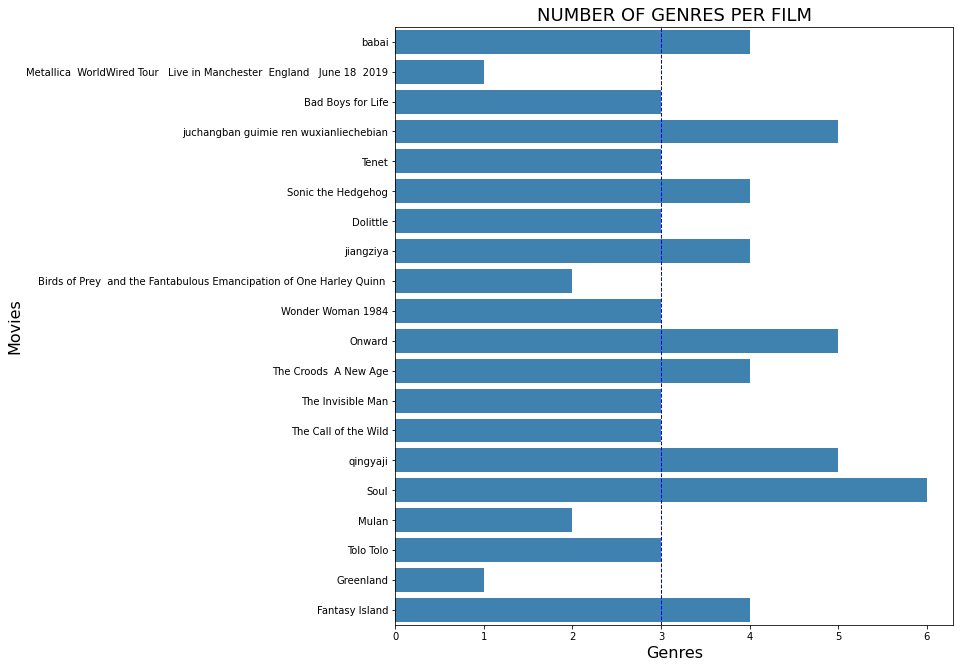

In [27]:
# Draw the Boxplots of all variables
f,ax = plt.subplots(figsize=(10, 11))
sb.barplot(y = "film", x = "no_of_genres", data = df, color="#2E86C1")

avg_no_gen = int(df['no_of_genres'].mean())

ax.axvline(x=avg_no_gen, color='b', label='Average', linestyle='--', linewidth=1)

plt.title("NUMBER OF GENRES PER FILM", fontsize=18)
plt.xlabel("Genres", fontsize=16)
plt.ylabel("Movies", fontsize=16)

So the average number of genres per film would be around 3. From the bar plot above, apart from Metallica Tour, in general, most films with at least 3 genres tend to fair better than those with 2 or less genres.

<h1><font color=blue><fontsize: 45pt><center>Number of genre vs revenue</center></h1>

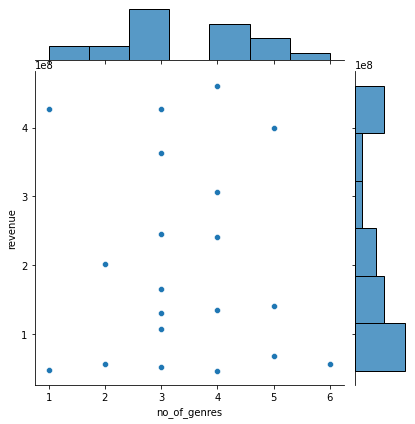

In [28]:
sb.jointplot(data = df, x = "no_of_genres", y = "revenue", height = 6)

In [29]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [30]:
# Extract Response and Predictors
y = pd.DataFrame(df['revenue'])
x = pd.DataFrame(df['no_of_genres'])
linreg.fit(x, y)

LinearRegression()

In [31]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [2.3090477e+08]
Coefficients 	: a =  [[-7887589.39024391]]


<H3><font color=brown> LINEAR REGRESSION </H3>

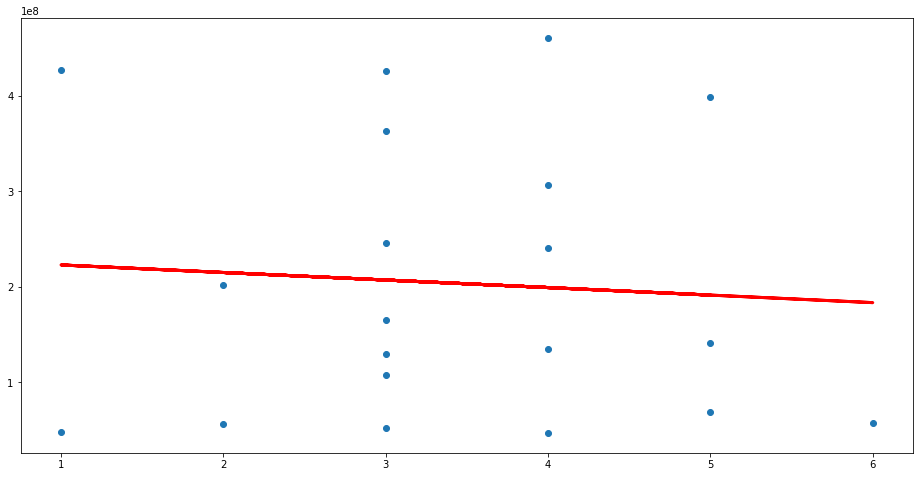

In [32]:
# Formula for the Regression line
regline_x = x
regline_y = linreg.intercept_ + linreg.coef_ * x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(x, y)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

From the these plots, it goes to show that more genres doesnt mean higher revenue, and the optimal number of genres per film should be around 2 to 3

<h1><font color=blue><fontsize: 45pt><center>Basic Analysis of Action Movies</center></h1>

As stated previously, action films are the best genres as they have proven to earn the highest revenue on average,
Hence we decide to a deeper analysis of action movies

In [33]:
# create dataframe with film and revenue columns

act_df = pd.DataFrame(columns = ['revenue'])
for i in df['genre']:
    if 'Action' in i:
        #print(df[df['genre']==i]['revenue'].item())
        act_df.loc[len(act_df)]=[df[df['genre']==i]['revenue'].astype(int).item()] # store title and revenue in our dataframe

#act_df

<H3><font color=brown> Revenue Figures For Films That Include Action </H3>

<AxesSubplot:>

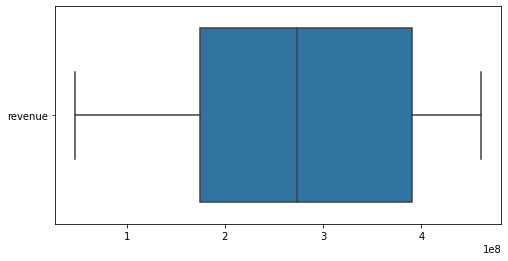

In [34]:
f = plt.figure(figsize=(8, 4))
sb.boxplot(data = act_df, orient = "h")

<AxesSubplot:>

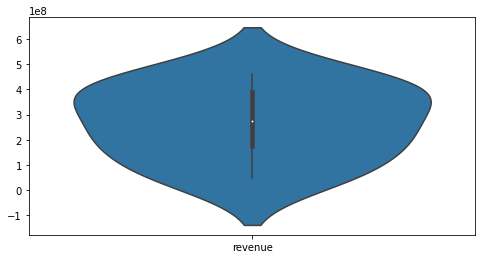

In [35]:
f = plt.figure(figsize=(8, 4))
sb.violinplot(data = act_df)

As can be seen from the 2 plots, the distribution of action movies give rise to on average between 170mil to about 400mil of revenue

<h1><font color=blue><fontsize: 45pt><center>Basic analysis of the past 5 Years</center></h1>

In [36]:
api_key = 'aaa47fdcde4f3ddc7519fb20b452e47c'

response2016 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2016&sort_by=revenue.desc')
result2016 = response2016.json()
titles2016 = result2016['results']

new_dict = {}

for i in range(len(titles2016)) :
    new_dict[i] = [titles2016[i]['popularity'], titles2016[i]['release_date'], titles2016[i]['vote_average'], titles2016[i]['id'], titles2016[i]['adult'], titles2016[i]['original_title'], titles2016[i]['genre_ids'], titles2016[i]['overview']]
    
data2016 = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['popularity', 'release-date', 'vote_average','id', 'adult', 'original_title', 'genre_ids', 'overview'])
columns = ['popularity', 'release-date','vote_average', 'id', 'adult', 'original_title', 'genre_ids', 'overview']
data2016.head(1)

,popularity,release-date,vote_average,id,adult,original_title,genre_ids,overview
0,148.992,2016-04-27,7.4,271110,False,Captain America: Civil War,"[12, 28, 878]","Following the events of Age of Ultron, the col..."


In [37]:
response2017 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2017&sort_by=revenue.desc')
result2017 = response2017.json()
titles2017 = result2017['results']

new_dict = {}

for i in range(len(titles2017)) :
    new_dict[i] = [titles2017[i]['popularity'], titles2017[i]['release_date'], titles2017[i]['vote_average'], titles2017[i]['id'], titles2017[i]['adult'], titles2017[i]['original_title'], titles2017[i]['genre_ids'],  titles2017[i]['overview']]  
data2017 = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['popularity', 'release-date', 'vote_average','id', 'adult', 'original_title', 'genre_ids', 'overview'])
columns = ['popularity', 'release-date','vote_average', 'id', 'adult', 'original_title', 'genre_ids', 'overview']
data2017.head(1)

,popularity,release-date,vote_average,id,adult,original_title,genre_ids,overview
0,83.858,2017-12-13,6.9,181808,False,Star Wars: The Last Jedi,"[878, 28, 12]",Rey develops her newly discovered abilities wi...


In [38]:
response2018 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2018&sort_by=revenue.desc')
result2018 = response2018.json()
titles2018 = result2018['results']

new_dict = {}

for i in range(len(titles2018)) :
    new_dict[i] = [titles2018[i]['popularity'], titles2018[i]['release_date'], titles2018[i]['vote_average'], titles2018[i]['id'], titles2018[i]['adult'], titles2018[i]['original_title'], titles2018[i]['genre_ids'], titles2018[i]['overview']]  
data2018 = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['popularity', 'release-date', 'vote_average','id', 'adult', 'original_title', 'genre_ids', 'overview'])
columns = ['popularity', 'release-date','vote_average', 'id', 'adult', 'original_title', 'genre_ids', 'overview']
data2018.head(1)

,popularity,release-date,vote_average,id,adult,original_title,genre_ids,overview
0,355.158,2018-04-25,8.3,299536,False,Avengers: Infinity War,"[12, 28, 878]",As the Avengers and their allies have continue...


In [39]:
response2019 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2019&sort_by=revenue.desc')
result2019 = response2019.json()
titles2019 = result2019['results']

new_dict = {}

for i in range(len(titles2019)) :
    new_dict[i] = [titles2019[i]['popularity'], titles2019[i]['release_date'], titles2019[i]['vote_average'], titles2019[i]['id'], titles2019[i]['adult'], titles2019[i]['original_title'], titles2019[i]['genre_ids'],titles2019[i]['overview']]
    
data2019 = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['popularity', 'release-date', 'vote_average','id', 'adult', 'original_title', 'genre_ids', 'overview'])
columns = ['popularity', 'release-date','vote_average', 'id', 'adult', 'original_title', 'genre_ids', 'overview']
data2019.head(1)

,popularity,release-date,vote_average,id,adult,original_title,genre_ids,overview
0,349.0,2019-04-24,8.3,299534,False,Avengers: Endgame,"[12, 878, 28]",After the devastating events of Avengers: Infi...


In [40]:
response2020 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2020&sort_by=revenue.desc')
result2020 = response2020.json()
titles2020 = result2020['results']

new_dict = {}

for i in range(len(titles2020)) :
    new_dict[i] = [titles2020[i]['popularity'], titles2020[i]['release_date'], titles2020[i]['vote_average'], titles2020[i]['id'], titles2020[i]['adult'], titles2020[i]['original_title'], titles2020[i]['genre_ids'],titles2020[i]['overview']]
    
data2020 = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['popularity', 'release-date', 'vote_average','id', 'adult', 'original_title', 'genre_ids', 'overview'])
columns = ['popularity', 'release-date','vote_average', 'id', 'adult', 'original_title', 'genre_ids', 'overview']
data2020.head(1)

,popularity,release-date,vote_average,id,adult,original_title,genre_ids,overview
0,11.047,2020-08-14,7.2,508935,False,八佰,"[10752, 36, 18, 28]","In 1937, eight hundred Chinese soldiers fight ..."


In [41]:
result = data2016.append(data2016).append(data2017).append(data2018).append(data2019).append(data2020)
result = result.sort_values(by='vote_average', ascending = False)
#result.head(50)

result.reset_index(drop = True, inplace = True)
resultTop5 = result[0:5]
#resultTop5

<H3><font color=brown>Title Analysis </H3>

In [42]:
from os import path
import imageio
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS

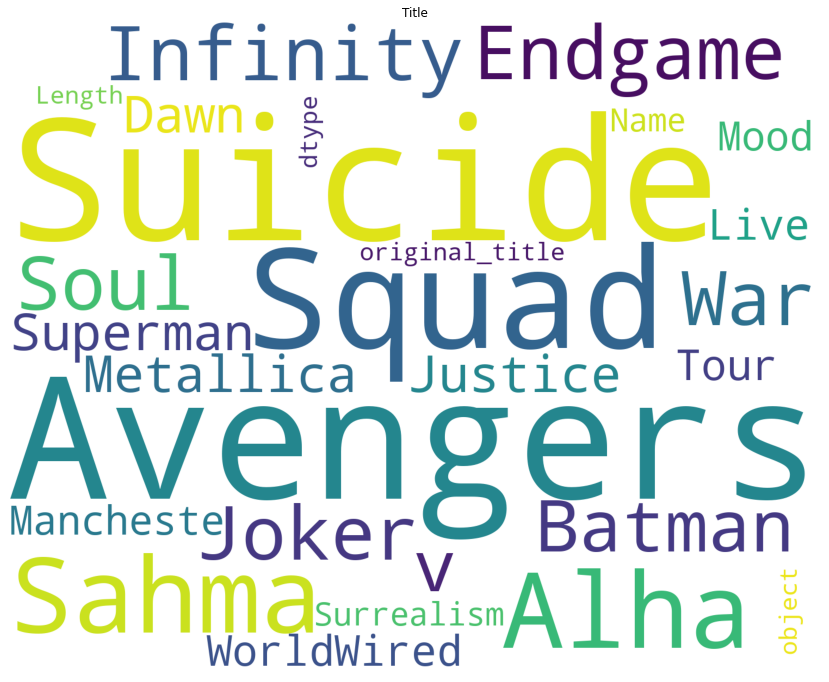

In [43]:
text = (str(result['original_title']))
plt.subplots(figsize=(16,12))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Title')
plt.axis('off')
plt.show()

<H3><font color=brown>Overview Descrition Analysis</H3>

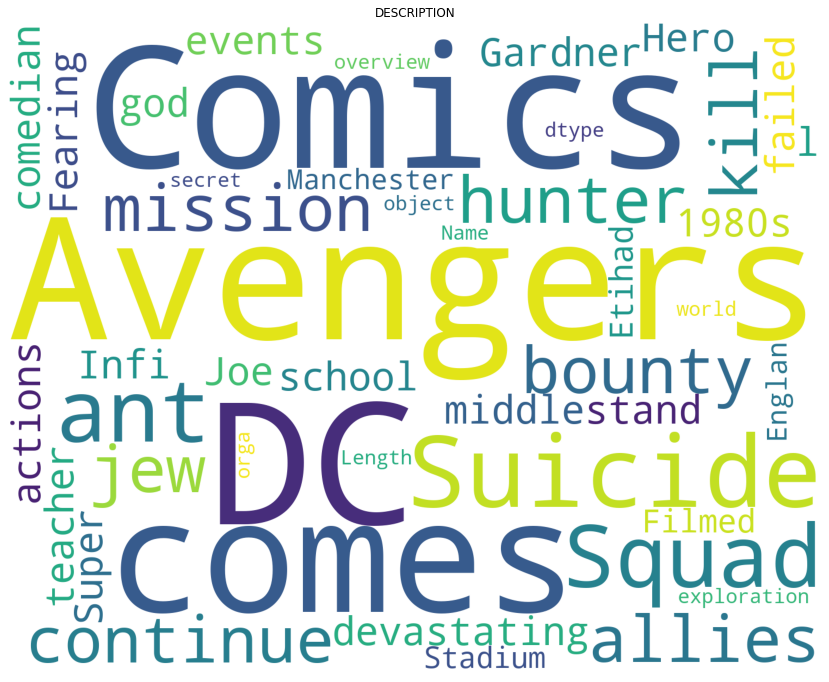

In [44]:
text = (str(result['overview']))
plt.subplots(figsize=(16,12))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('DESCRIPTION')
plt.axis('off')
plt.show()

<H3><font color=brown>Adult Movies vs popularity </H3>

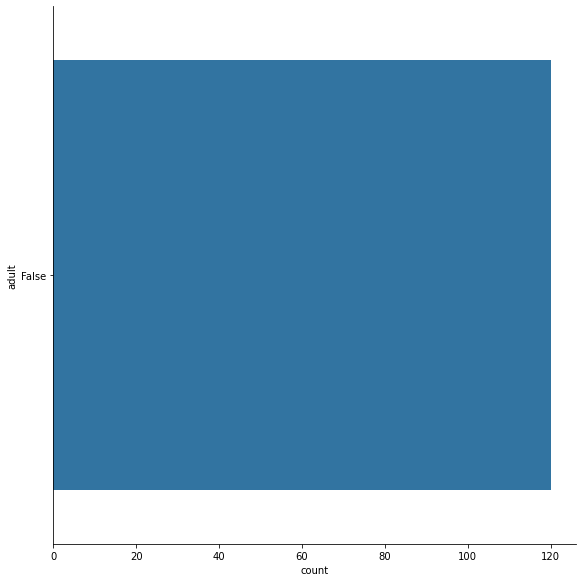

In [45]:
sb.catplot(y = 'adult', data = result, kind = "count", height = 8)

In the past 5 years, the top 20 movies of each year, `ALL` the movies were NOT an 'adult' firm.
We can infer that movies that are suited for all age group are more well received.

<H3><font color=brown>Top 5 movies in the last 5 Years</H3>

<AxesSubplot:xlabel='vote_average', ylabel='original_title'>

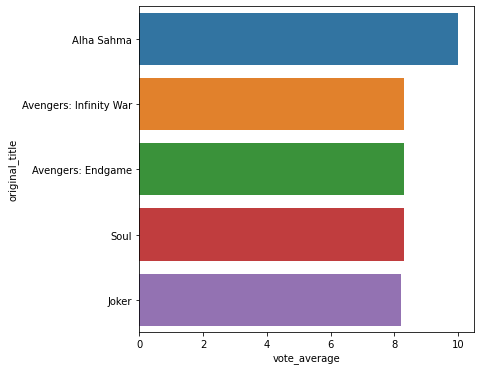

In [46]:
f = plt.figure(figsize=(6, 6))
sb.barplot(x="vote_average", y="original_title", data= resultTop5)

`Alha Sahma`, `Avengers:Infinity War`, `Avengers: Endgame`, `Soul` and `Joker` are the 5 movies that received the highest vote average within the last 5 years

<h1><font color=blue><fontsize: 45pt><center>Vote Count vs Popularity</center></h1>

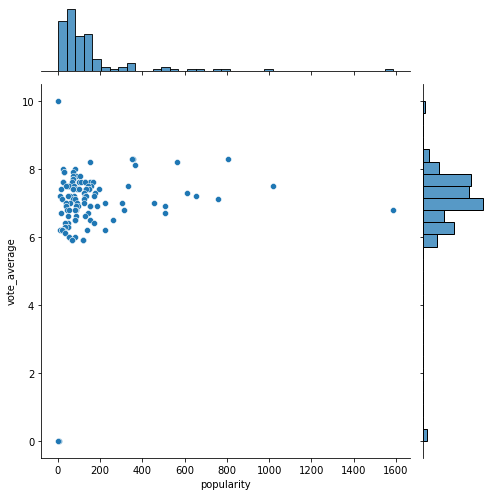

In [47]:
sb.jointplot(data = result, x = "popularity", y = "vote_average", height = 7)

Intercept 	: b =  [-49.15288286]
Coefficients 	: a =  [[28.94934322]]


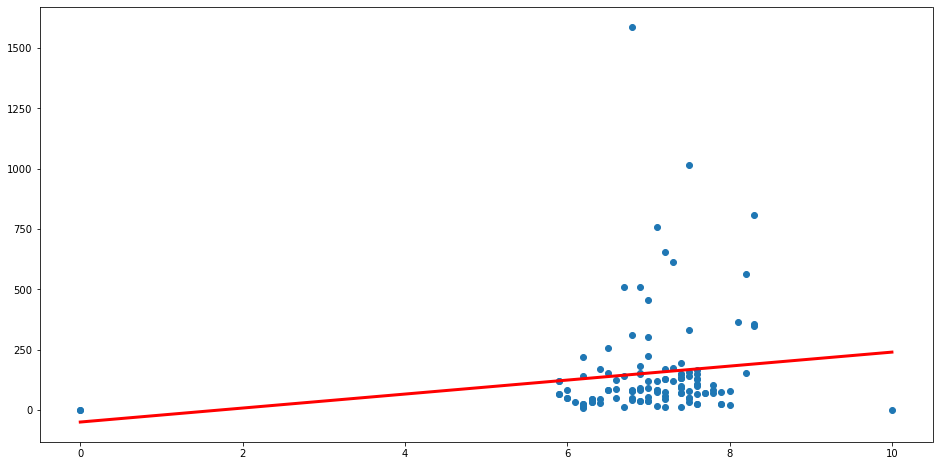

In [48]:
# Create a Linear Regression object
linreg = LinearRegression()

# Extract Response and Predictors
y = pd.DataFrame(result['popularity'])
x = pd.DataFrame(result['vote_average'])
linreg.fit(x, y)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = x
regline_y = linreg.intercept_ + linreg.coef_ * x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(x, y)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

The above graph shows the relationship between popularity and vote count for the last 5 years. It is evident that popularity and vote count `DOES NOT` have a direct relation. `With that in mind, we will dive deeper in the co-relation between runtime, vote_average and budget vs revenue`

# Testing Only

### Popularity throughout the 5 years.

In [49]:
def _constructorNoOfMov(varN): # Number of movies Per Month
    varN.sort_index(inplace=True) #Ensure plotting in time order

    fig, ax = plt.subplots()
    varN.assign(dates = newR0.index.strftime('%m')).plot(kind='bar', x='dates', ax=ax)

    ax.legend(["Number of movies produced Per Month"]);
    ax.set_xlabel("Months")

    fig.autofmt_xdate()  #Rotate the dates so they aren't squished
    plt.show()
    
def _constructorPopularity(varN): # Popularity Per Month
    varN.sort_index(inplace=True) #Ensure plotting in time order

    fig, ax = plt.subplots()
    varN.assign(dates = varN.index.strftime('%m')).plot(kind='bar', x='dates', ax=ax)
    
    ax.legend(["Total Popularity Per Month"]);
    ax.set_xlabel("Months")

    fig.autofmt_xdate()  #Rotate the dates so they aren't squished
    plt.show()

In [51]:
data2016['release-date'] = data2016['release-date'].astype('datetime64[ns]')
newR6 = data2016.groupby(pd.Grouper(key='release-date',freq='M')).sum()
newR6.drop(['id', 'vote_average', 'adult'], inplace=True, axis=1)

data2017['release-date'] = data2017['release-date'].astype('datetime64[ns]')
newR7 = data2017.groupby(pd.Grouper(key='release-date',freq='M')).sum()
newR7.drop(['id', 'vote_average', 'adult'], inplace=True, axis=1)

data2018['release-date'] = data2018['release-date'].astype('datetime64[ns]')
newR8 = data2018.groupby(pd.Grouper(key='release-date',freq='M')).sum()
newR8.drop(['id', 'vote_average', 'adult'], inplace=True, axis=1)

data2019['release-date'] = data2019['release-date'].astype('datetime64[ns]')
newR9 = data2019.groupby(pd.Grouper(key='release-date',freq='M')).sum()
newR9.drop(['id', 'vote_average', 'adult'], inplace=True, axis=1)

data2020['release-date'] = data2020['release-date'].astype('datetime64[ns]')
newR0 = data2020.groupby(pd.Grouper(key='release-date',freq='M')).sum()
newR0.drop(['id', 'vote_average', 'adult'], inplace=True, axis=1)

result['release-date'] = result['release-date'].astype('datetime64[ns]')
newR = result.groupby(pd.Grouper(key='release-date',freq='Y')).sum()
newR.drop(['id', 'vote_average', 'adult'], inplace=True, axis=1)

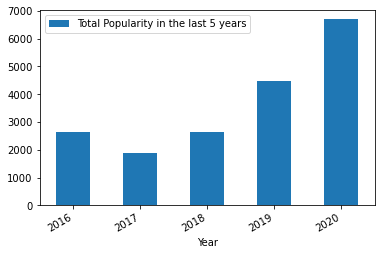

In [ ]:
import matplotlib.dates as mdates

newR.sort_index(inplace=True) #Ensure plotting in time order

fig, ax = plt.subplots()
newR.assign(dates = newR.index.strftime('%Y')).plot(kind='bar', x='dates', ax=ax)

ax.legend(["Total Popularity in the last 5 years"]);
ax.set_xlabel("Year")

fig.autofmt_xdate()  #Rotate the dates so they aren't squished
plt.show()

year = input("Which year would you want to see in more details: ")

if (year == '2016'):

    _constructorPopularity(newR6)

elif (year == '2017'):

    _constructorPopularity(newR7)
    
elif (year == '2018'):

    _constructorPopularity(newR8)
    
elif (year == '2019'):

    _constructorPopularity(newR9)
    
elif (year == '2020'):

    _constructorPopularity(newR0)

else:
    printf("Invalid input")

### Number of Movies Released Per Month

In [ ]:
data2016['release-date'] = data2016['release-date'].astype('datetime64[ns]')
newN6 = data2016.groupby(pd.Grouper(key='release-date',freq='M')).count()
newN6.drop(['id', 'vote count', 'adult', 'original_title', 'genre_ids', 'overview'], inplace=True, axis=1)

data2017['release-date'] = data2017['release-date'].astype('datetime64[ns]')
newN7 = data2017.groupby(pd.Grouper(key='release-date',freq='M')).count()
newN7.drop(['id', 'vote count', 'adult', 'original_title', 'genre_ids', 'overview'], inplace=True, axis=1)

data2018['release-date'] = data2018['release-date'].astype('datetime64[ns]')
newN8 = data2018.groupby(pd.Grouper(key='release-date',freq='M')).count()
newN8.drop(['id', 'vote count', 'adult', 'original_title', 'genre_ids', 'overview'], inplace=True, axis=1)

data2019['release-date'] = data2019['release-date'].astype('datetime64[ns]')
newN9 = data2019.groupby(pd.Grouper(key='release-date',freq='M')).count()
newN9.drop(['id', 'vote count', 'adult', 'original_title', 'genre_ids', 'overview'], inplace=True, axis=1)

data2020['release-date'] = data2020['release-date'].astype('datetime64[ns]')
newN0 = data2020.groupby(pd.Grouper(key='release-date',freq='M')).count()
newN0.drop(['id', 'vote count', 'adult', 'original_title', 'genre_ids', 'overview'], inplace=True, axis=1)

In [ ]:
#year = input("Which year would you view: ")

if (year == '2016'):

    _constructorNoOfMov(newN6)

elif (year == '2017'): #Need to add row at the top (Error)

    _constructorNoOfMov(newN7)
    
elif (year == '2018'): #Need to add row at the top (Error)

    _constructorNoOfMov(newN8)
    
elif (year == '2019'):

    _constructorNoOfMov(newN9)
    
elif (year == '2020'):

    _constructorNoOfMov(newN0)

else:
    printf("Invalid input")

### Genre Produced throughout the 5 years
# ERROR get genre, revenue, runtime throughout the 5 years in df

- directors in high revenue movies (Combined with the bottom ones)
- top 10 runtime of movies (Pie chart)
- runtime (distplot)
- genre and revenue relationship
- genre and runtime relationship
- director and revenue relationship
- content rating with content_rating (boxplot)

`get the mean and medium for votes` 
#### determine what is below average, what is above average and what is average

- do jointplot for movies 
- rating and revenue for all 3 cat
- more than half million revenue average voting
- movies with less than half million revenue average voting

In [ ]:
response = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=aaa47fdcde4f3ddc7519fb20b452e47c&language=en-US')
genreL = response.json()
genreL = genreL['genres']
new_dict = {}
for i in range(len(genreL)) :
    new_dict[i] = [genreL[i]['id'], genreL[i]['name']]

In [ ]:
data2016.head(1)
len(data2016)
columns = ['release-date', 'genre', 'no_of_genres']

# create dataframe with film and revenue columns
Ndf = pd.DataFrame(columns=columns)
Ndf

In [ ]:
data2016.reset_index(drop = True,inplace = True)

for i in range(len(data2016)):
    genre = ''
    no_gen = 0
    releaseDate = data2016['release-date'][i]

In [ ]:
newN6

In [ ]:
result.head()

## Rating Based on Year

In [ ]:
result['release-date'] = result['release-date'].dt.strftime('%Y')
result.head()

In [ ]:
sb.stripplot(x="release-date", y="popularity", data=result, jitter=True);
print(' POPULARITY BASED ON YEAR')

In [ ]:
sb.stripplot(x="release-date", y="vote count", data=result, jitter=True);
print(' VOTE COUNT BASED ON YEAR')